**Problem statement:**

In this dataset have a one year of rattanpower stocks status so you find the closing price.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import pickle

In [59]:
df =pd.read_csv('https://raw.githubusercontent.com/sethukrish6420/Rattanpower_stock_prediction/main/ratpow.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-18,5.85,5.95,5.70,5.75,5.75,5486248
1,2022-02-21,5.70,5.75,5.50,5.50,5.50,5002934
2,2022-02-22,5.25,5.30,5.25,5.25,5.25,4052917
3,2022-02-23,5.05,5.50,5.05,5.50,5.50,6936643
4,2022-02-24,5.25,5.25,5.25,5.25,5.25,2415354


**Understand the data:**

In [60]:
df.shape

(249, 7)

In [61]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [62]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,4.400602,4.485542,4.286145,4.372088,4.372088,1.291186e+07
std,0.753466,0.769185,0.719388,0.742431,0.742431,1.178508e+07
min,3.250000,3.350000,3.200000,3.250000,3.250000,1.046562e+06
25%,3.900000,3.950000,3.800000,3.900000,3.900000,5.805084e+06
50%,4.150000,4.250000,4.100000,4.150000,4.150000,9.245707e+06
75%,4.750000,4.900000,4.600000,4.700000,4.700000,1.536037e+07
max,6.650000,6.650000,6.100000,6.350000,6.350000,7.507371e+07


**Clean the data**

In [63]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [64]:
# there is no null values

In [65]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [66]:
df['Date'] = pd.to_datetime(df['Date'])

In [67]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [68]:
del df['Adj Close']

In [69]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-02-18,5.85,5.95,5.70,5.75,5486248
1,2022-02-21,5.70,5.75,5.50,5.50,5002934
2,2022-02-22,5.25,5.30,5.25,5.25,4052917
3,2022-02-23,5.05,5.50,5.05,5.50,6936643
4,2022-02-24,5.25,5.25,5.25,5.25,2415354


In [70]:
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [71]:
df.head()

,Date,Open,High,Low,Close,Volume,DayOfWeek
0,2022-02-18,5.85,5.95,5.70,5.75,5486248,4
1,2022-02-21,5.70,5.75,5.50,5.50,5002934,0
2,2022-02-22,5.25,5.30,5.25,5.25,4052917,1
3,2022-02-23,5.05,5.50,5.05,5.50,6936643,2
4,2022-02-24,5.25,5.25,5.25,5.25,2415354,3


In [72]:
del df['Date']

In [73]:
df.head()

,Open,High,Low,Close,Volume,DayOfWeek
0,5.85,5.95,5.70,5.75,5486248,4
1,5.70,5.75,5.50,5.50,5002934,0
2,5.25,5.30,5.25,5.25,4052917,1
3,5.05,5.50,5.05,5.50,6936643,2
4,5.25,5.25,5.25,5.25,2415354,3


In [74]:
df.drop_duplicates()

,Open,High,Low,Close,Volume,DayOfWeek
0,5.85,5.95,5.70,5.75,5486248,4
1,5.70,5.75,5.50,5.50,5002934,0
2,5.25,5.30,5.25,5.25,4052917,1
3,5.05,5.50,5.05,5.50,6936643,2
4,5.25,5.25,5.25,5.25,2415354,3
...,...,...,...,...,...,...
244,3.70,3.70,3.55,3.60,3036676,0
245,3.60,3.65,3.45,3.50,6016554,1
246,3.50,3.55,3.45,3.55,3731275,2
247,3.55,3.60,3.45,3.50,5317360,3


**Split the data**

In [75]:
x = df[['Open','High','Low','Volume','DayOfWeek']].values
y = df['Close'].values

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

**Scale the data**

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc = scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Modeling the data**

In [78]:
# linearRegression
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lr = lin.fit(x_train,y_train)
lin.score(x_test,y_test) 

0.9915140147145441

In [79]:
y_pred = lin.predict(x_test)
y_pred

array([5.8395696 , 4.3103907 , 5.81685515, 4.19697991, 4.45412804,
       4.15411374, 4.51418104, 3.94427646, 5.10112333, 5.36591205,
       4.02563984, 3.79301592, 3.28442394, 3.85621619, 5.5962979 ,
       4.27628647, 3.5014431 , 3.84555003, 4.16832946, 5.60612796,
       3.38170899, 4.47275184, 3.32706556, 5.55888445, 3.81633527,
       3.41059851, 3.68522841, 4.63863894, 3.90427845, 4.00978651,
       4.20152695, 4.00305875, 4.26453677, 5.81161496, 3.56801021,
       4.21662499, 4.14292919, 3.91320938, 5.80795735, 3.68226975,
       3.46008149, 5.26930545, 4.19778907, 4.83349623, 3.85043986,
       3.91383933, 4.18303519, 4.35399475, 3.95915824, 4.43404426])

In [80]:
final_dataframe = pd.DataFrame({"Actual":y_test,'Predicted': y_pred})
final_dataframe.head()

,Actual,Predicted
0,5.80,5.839570
1,4.30,4.310391
2,6.05,5.816855
3,4.20,4.196980
4,4.40,4.454128


**Evaluation**

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9915140147145441

In [82]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10]:
  dr = DecisionTreeRegressor()
  dr.fit(x_train,y_train)
  print('k_value =  ',i,'cv_score = ',np.mean(cross_val_score(dr,x_train,y_train,cv=10)))  


k_value =   1 cv_score =  0.9742885366259421
k_value =   2 cv_score =  0.9718394442187417
k_value =   3 cv_score =  0.9730307867669937
k_value =   4 cv_score =  0.9716779085976797
k_value =   5 cv_score =  0.9749417728799246
k_value =   6 cv_score =  0.9714931071693711
k_value =   7 cv_score =  0.9751814049092463
k_value =   8 cv_score =  0.9760333956869724
k_value =   9 cv_score =  0.9728068176259288
k_value =   10 cv_score =  0.9699645519454316


In [83]:
# best k value is 8
dr = DecisionTreeRegressor(max_depth = 8)
dr.fit(x_train,y_train)
dr.score(x_test,y_test)

0.9754366679841923

**Evaluation**

In [84]:
y_pred = dr.predict(x_test)
r2_score(y_test,y_pred)

0.9754366679841923

**Important features**

In [85]:
dr = DecisionTreeRegressor(max_depth = 8)
dr.fit(x_train,y_train)
importance = dr.feature_importances_
feature_names = np.array(['Open','High','Low','Volume','DayOfWeek'])
for feature_name, importance in zip(feature_names, importance):
    print(f"{feature_name}: {importance:.4f}")


Open: 0.0011
High: 0.0520
Low: 0.9443
Volume: 0.0024
DayOfWeek: 0.0003


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


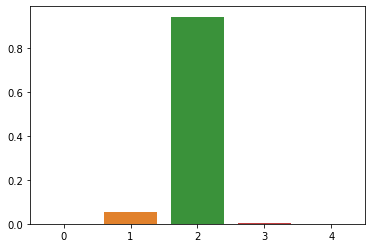

In [86]:
importance = dr.feature_importances_
sns.barplot([x for x in range(len(importance))],importance)

**For Prediction**

In [87]:
with open('scaler.pkl','wb') as f:
  pickle.dump(sc,f)

In [88]:
with open('modeler.pkl','wb') as f:
  pickle.dump(lr,f)

In [89]:
with open('scaler.pkl','rb') as f:
  scaler = pickle.load(f)

In [90]:
with open('modeler.pkl','rb') as f:
  model = pickle.load(f)

In [95]:
list = [[9.8,	8.5,	5.0, 5485,	4	]]

In [96]:
test = scaler.transform(list)
pred  = model.predict(test)
pred

array([4.74217162])